# 과제#1. 더반찬 주문량 예측

## 0. 환경준비

### 0.1 Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  

### 0.2 Data Loading

In [2]:
# raw data 로딩 
raw_data = pd.read_csv(r'C:\Users\user\Desktop\intern.csv')
raw_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE
0,0,202201095519105,2022-01-11 00:00:00,2022-01-09 12:26:10,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,충청북도 증평군 증평읍 송산로 11 (지평더웰아파트),6900,569.0,6331
1,1,202201105522898,2022-01-11 00:00:00,2022-01-10 10:35:49,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,서울특별시 강남구 논현로85길 52 (역삼동),6900,177.0,6723
2,2,202201115527172,2022-01-12 00:00:00,2022-01-11 11:38:32,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,"서울특별시 송파구 올림픽로4길 42 (잠실동, 우성아파트)",6900,221.0,6679
3,3,202201105523467,2022-01-12 00:00:00,2022-01-10 13:21:51,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,강원도 속초시 도리원길 11-14 (노학동),6900,128.0,6772
4,4,202201105522519,2022-01-11 00:00:00,2022-01-10 08:16:21,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,"경기도 용인시 수지구 동천로 64 (동천동, 동천마을동문굿모닝힐5차아파트)",6900,157.0,6743


In [3]:
# 카피 데이터 생성
copy_data = raw_data.copy()

# 희망배송일 순서대로 데이터를 정렬
copy_data = copy_data.sort_values(by = 'H_YMD')


copy_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE
166288,119348,201912302355791,2020-01-01 00:00:00,2019-12-30 21:59:40,단품,단품,14375,옛날잡채(500g),메인요리,1,0,0,1,"경기도 수원시 장안구 경수대로976번길 22 (조원동, 수원 한일타운)",8600,1408.0,7192
37753,37753,201912302355557,2020-01-01 00:00:00,2019-12-30 20:50:07,단품,단품,1901012353,수제계란말이(350g),반찬,2,0,0,2,서울 성북구 동소문로34길 24 삼성아파트,6300,NaN,6300
162585,115645,201912302353567,2020-01-01 00:00:00,2019-12-30 11:02:39,단품,단품,1823,숙주나물(300g),반찬,1,0,0,1,"서울특별시 마포구 삼개로 33 (도화동, 도화3지구우성아파트)",3300,486.0,2814
164041,117101,201912302354611,2020-01-01 00:00:00,2019-12-30 15:19:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,경기도 용인시 수지구 문인로3번길 22 (풍덕천동),6900,264.0,6636
164040,117100,201912302352965,2020-01-01 00:00:00,2019-12-30 10:08:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,"경기도 구리시 아차산로487번길 27 (교문동, 아차산어울림아파트)",6900,317.0,6583


## 1. 데이터 전처리

### 1.0 결측치 확인

In [4]:
# 결측치가 있는 데이터 확인
copy_data.isna().sum()

Unnamed: 0                   0
ORD_NO                       0
H_YMD                        0
O_YMD                        0
PKG_GOODS_NO                 0
PKG_GOODS_NM                 0
GOODS_NO                     0
GOODS_NM                     0
STD_GSGR_NO_LEV1_NM          0
ORD_QTY                      0
CANCEL_QTY                   0
RET_QTY                      0
REAL_ORD_QTY                 0
RECVR_ROAD_BASE_ADDR         0
SALE_PRICE                   0
DISCOUNT_AMT            376247
FINAL_PRICE                  0
dtype: int64

### 1.1 예측 대상과 다른 데이터를 제거

In [5]:
# 예측 대상에는 없는 상품들은 모두 nan값으로 변경
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)'] = np.nan
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)'] = np.nan
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '고사리나물볶음(150g)'] = np.nan

C:\Users\user\AppData\Local\Temp\ipykernel_1472\2166727803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)'] = np.nan
C:\Users\user\AppData\Local\Temp\ipykernel_1472\2166727803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)'] = np.nan
C:\Users\user\AppData\Local\Temp\ipykernel_1472\2166727803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

### 1.2 잘못 적재되어 있는 데이터 전처리

In [6]:
# 내일한정, 한정판매는 단품으로 대체
# 한정판매 중에는 단품이 아닌 세트도 있어서 이를 유의해야 함(ex. '[한정판매]손님초대상 set', '[한정판매]반찬 한 상 set', '[한정판매]키즈 set')

# 내일한정이 붙은 제품은 모두 단품인 것을 확인하여 카테고리를 단품으로 바꿔줌, 
# [내일한정] 고소한도토리묵무침(265g), [내일한정] 건고사리나물볶음(150g), [내일한정] 꼬막무침 (250g)은 제외
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'].str.contains('내일한정')] = '단품'

# 한정판매 중에서 두 제품만 단품이었기에 두 제품을 단품으로 바꿔줌
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 두메산나물비빔밥재료'] = '단품'  
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 옛날잡채(500g)'] = '단품'

# 단품으로 바꿔주지 않은 모든 제품을 세트로 바꿔줌
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] != '단품'] = '세트'

C:\Users\user\AppData\Local\Temp\ipykernel_1472\1220614922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'].str.contains('내일한정')] = '단품'
C:\Users\user\AppData\Local\Temp\ipykernel_1472\1220614922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 두메산나물비빔밥재료'] = '단품'
C:\Users\user\AppData\Local\Temp\ipykernel_1472\1220614922.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

### 1.3 데이터 타입 변환

In [7]:
# 자재코드를 추후 가변수화를 위해 문자열 변수로 변환

copy_data['GOODS_NO'] = copy_data['GOODS_NO'].astype(str)

In [8]:
# 희망배송일 변수를 datetime 형식으로 변환

copy_data['H_YMD'] = pd.to_datetime(copy_data['H_YMD'])

### 1.4 특정 컬럼의 결측치 채우기 

In [9]:
# 할인액의 NaN값을 모두 0으로 대체
# 할인되지 않은 상품을 산것으로 추측되어 이 경우 할인액은 0이 되는게 맞다.

copy_data['DISCOUNT_AMT'].fillna(0, inplace=True)

In [10]:
# 위에서 만든 예측 대상과 다른 데이터에 들어있는 NaN 값을 모두 제거

copy_data.dropna(inplace=True)

In [11]:
copy_data.isna().sum()

Unnamed: 0              0
ORD_NO                  0
H_YMD                   0
O_YMD                   0
PKG_GOODS_NO            0
PKG_GOODS_NM            0
GOODS_NO                0
GOODS_NM                0
STD_GSGR_NO_LEV1_NM     0
ORD_QTY                 0
CANCEL_QTY              0
RET_QTY                 0
REAL_ORD_QTY            0
RECVR_ROAD_BASE_ADDR    0
SALE_PRICE              0
DISCOUNT_AMT            0
FINAL_PRICE             0
dtype: int64

### 1.5 Feature Engineerung

In [12]:
# 할인율을 나타내는 SALE_PERCENTAGE 변수 생성
# 할인액 / 판매가격 * 100

copy_data['SALE_PERCETANGE'] = (copy_data['DISCOUNT_AMT'] / copy_data['SALE_PRICE']) * 100

In [13]:
# 희망배송일의 연도,월,일,시간,분,초를 각각 컬럼으로 만들어줌

copy_data['year'] = copy_data['H_YMD'].dt.year
copy_data['month'] = copy_data['H_YMD'].dt.month
copy_data['day'] = copy_data['H_YMD'].dt.day
copy_data['hour'] = copy_data['H_YMD'].dt.hour
copy_data['minute'] = copy_data['H_YMD'].dt.minute
copy_data['second'] = copy_data['H_YMD'].dt.second


In [14]:
copy_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,...,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,day,hour,minute,second
166288,119348,201912302355791,2020-01-01,2019-12-30 21:59:40,단품,단품,14375,옛날잡채(500g),메인요리,1,...,8600,1408.0,7192,16.372093,2020,1,1,0,0,0
37753,37753,201912302355557,2020-01-01,2019-12-30 20:50:07,단품,단품,1901012353,수제계란말이(350g),반찬,2,...,6300,0.0,6300,0.000000,2020,1,1,0,0,0
162585,115645,201912302353567,2020-01-01,2019-12-30 11:02:39,단품,단품,1823,숙주나물(300g),반찬,1,...,3300,486.0,2814,14.727273,2020,1,1,0,0,0
164041,117101,201912302354611,2020-01-01,2019-12-30 15:19:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,...,6900,264.0,6636,3.826087,2020,1,1,0,0,0
164040,117100,201912302352965,2020-01-01,2019-12-30 10:08:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,...,6900,317.0,6583,4.594203,2020,1,1,0,0,0


### 1.6 컬럼 제거

In [15]:
# 데이터의 컬럼 확인
copy_data.columns 

Index(['Unnamed: 0', 'ORD_NO', 'H_YMD', 'O_YMD', 'PKG_GOODS_NO',
       'PKG_GOODS_NM', 'GOODS_NO', 'GOODS_NM', 'STD_GSGR_NO_LEV1_NM',
       'ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY',
       'RECVR_ROAD_BASE_ADDR', 'SALE_PRICE', 'DISCOUNT_AMT', 'FINAL_PRICE',
       'SALE_PERCETANGE', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [16]:
# 불필요한 컬럼들 제거
# Unnamed: 단순 데이터 순서를 나타내는 컬럼이기에 삭제
# O_YMD: 주문 시간은 오더 건수와 큰 상관이 없기에 삭제
# ORD_NO: 주문 내용의 일련번호이기에 삭제
# PKG_GOODS_NO: PKG_GOODS_NM과 내용이 겹치고 잘못 적재된 데이터이기에 삭제
# RECVR_ROAD_BASE_ADDR: 비대면으로 주문하는 시대에 지역정보는 큰 의미가 없을 것 같아 삭제

dummy_col = ['Unnamed: 0', 'O_YMD', 'ORD_NO', 'PKG_GOODS_NO', 'RECVR_ROAD_BASE_ADDR']
copy_data = copy_data.drop(dummy_col, axis=1)

copy_data.head()

,H_YMD,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,day,hour,minute,second
166288,2020-01-01,단품,14375,옛날잡채(500g),메인요리,1,0,0,1,8600,1408.0,7192,16.372093,2020,1,1,0,0,0
37753,2020-01-01,단품,1901012353,수제계란말이(350g),반찬,2,0,0,2,6300,0.0,6300,0.000000,2020,1,1,0,0,0
162585,2020-01-01,단품,1823,숙주나물(300g),반찬,1,0,0,1,3300,486.0,2814,14.727273,2020,1,1,0,0,0
164041,2020-01-01,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,6900,264.0,6636,3.826087,2020,1,1,0,0,0
164040,2020-01-01,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,6900,317.0,6583,4.594203,2020,1,1,0,0,0


### 1.7 이상치 제거

c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-package

<AxesSubplot:xlabel='FINAL_PRICE'>

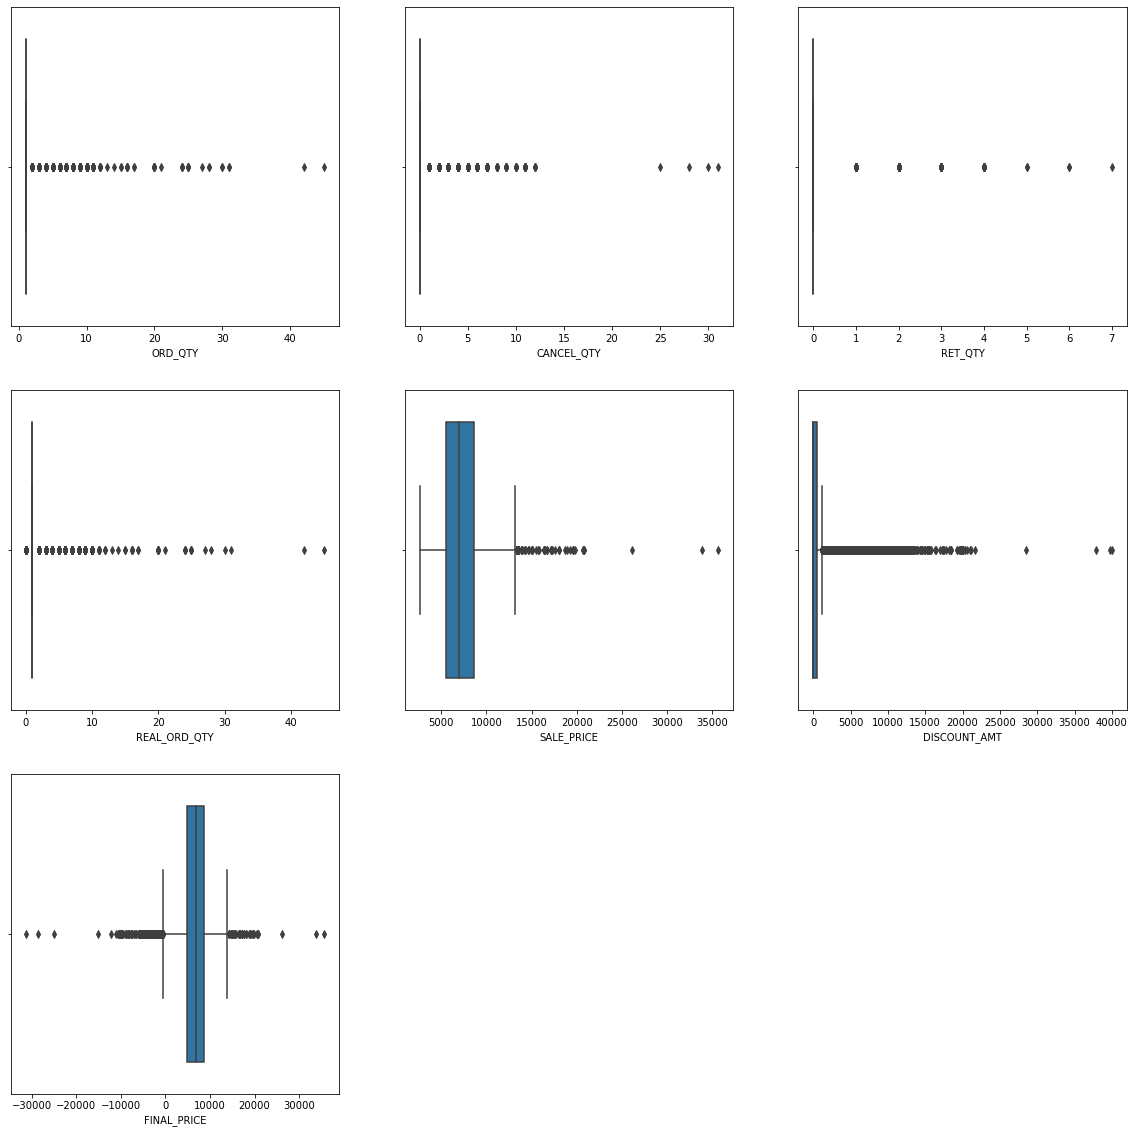

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='ORD_QTY',  orient = "v", data=copy_data)

plt.subplot(3,3,2)
sns.boxplot(x='CANCEL_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,3)
sns.boxplot(x='RET_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,4)
sns.boxplot(x='REAL_ORD_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,5)
sns.boxplot(x='SALE_PRICE', orient = "v", data=copy_data)

plt.subplot(3,3,6)
sns.boxplot(x='DISCOUNT_AMT', orient = "v", data=copy_data)

plt.subplot(3,3,7)
sns.boxplot(x='FINAL_PRICE', orient = "v", data=copy_data)

In [18]:
def outlier(df,col):
    q1 = df[col].quantile(0.25) # 1사분위
    q3 = df[col].quantile(0.75) # 3사분위 
    iqr = q3 - q1               # iqr 수치

    df.loc[(df[col] > (q3 + 1.5 * iqr)) | (df[col] < (q1 - 1.5 * iqr)), col] = df[col].median() # 이상치를 중앙값으로 대체

ol_col = ['ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY', 'SALE_PRICE', 'FINAL_PRICE']

for i in ol_col:
    print(i)
    outlier(copy_data, i)

ORD_QTY
CANCEL_QTY
RET_QTY
REAL_ORD_QTY
SALE_PRICE
FINAL_PRICE


c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-package

<AxesSubplot:xlabel='FINAL_PRICE'>

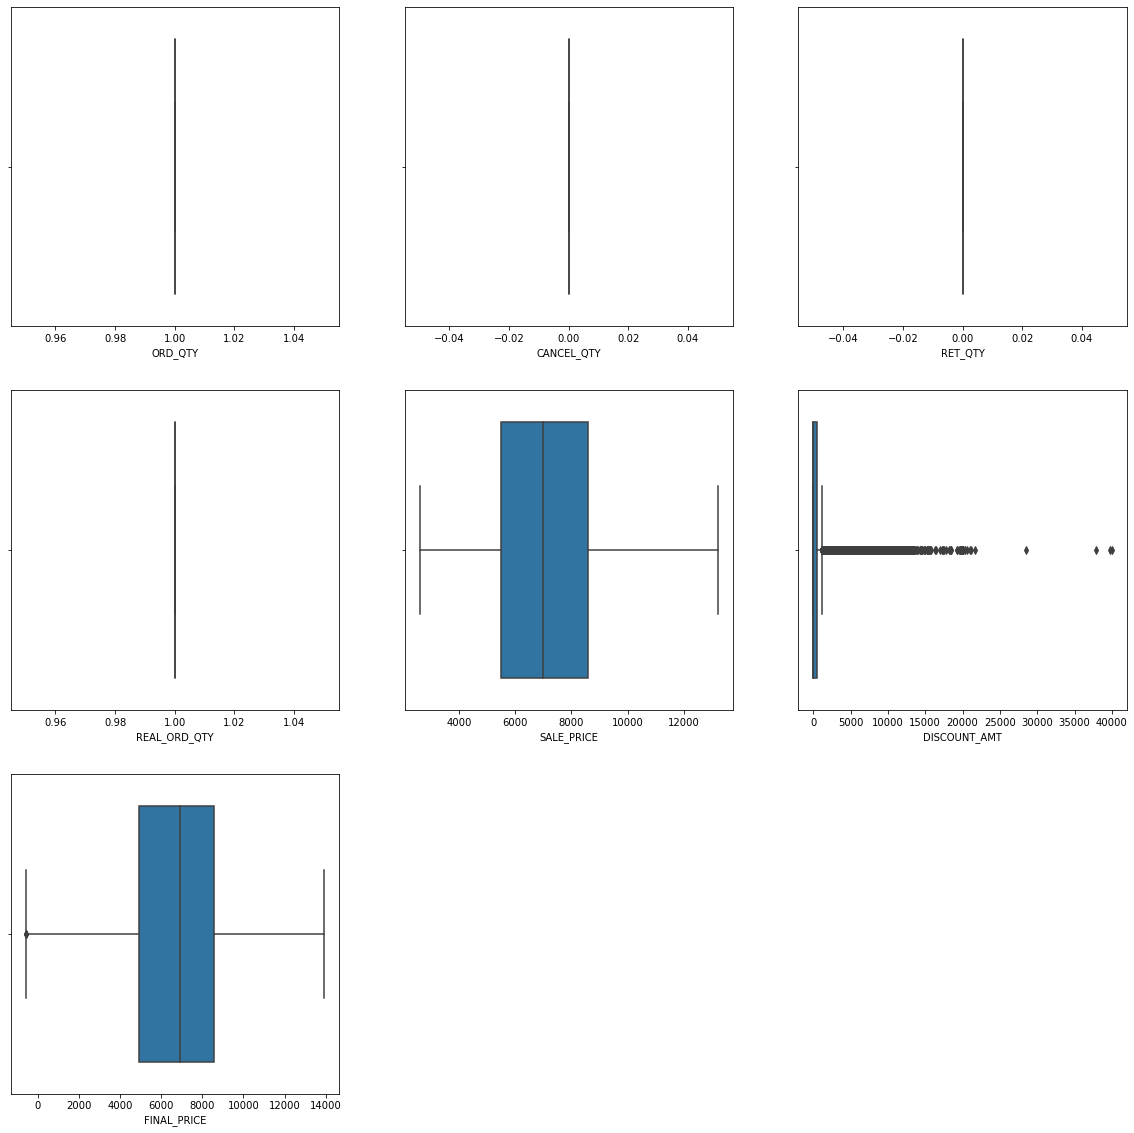

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='ORD_QTY',  orient = "v", data=copy_data)

plt.subplot(3,3,2)
sns.boxplot(x='CANCEL_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,3)
sns.boxplot(x='RET_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,4)
sns.boxplot(x='REAL_ORD_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,5)
sns.boxplot(x='SALE_PRICE', orient = "v", data=copy_data)

plt.subplot(3,3,6)
sns.boxplot(x='DISCOUNT_AMT', orient = "v", data=copy_data)

plt.subplot(3,3,7)
sns.boxplot(x='FINAL_PRICE', orient = "v", data=copy_data)


### 1.8 가변수화

In [20]:
# 가변수화가 필요한 데이터들을 확인한다.

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672123 entries, 166288 to 237568
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   H_YMD                672123 non-null  datetime64[ns]
 1   PKG_GOODS_NM         672123 non-null  object        
 2   GOODS_NO             672123 non-null  object        
 3   GOODS_NM             672123 non-null  object        
 4   STD_GSGR_NO_LEV1_NM  672123 non-null  object        
 5   ORD_QTY              672123 non-null  int64         
 6   CANCEL_QTY           672123 non-null  int64         
 7   RET_QTY              672123 non-null  int64         
 8   REAL_ORD_QTY         672123 non-null  int64         
 9   SALE_PRICE           672123 non-null  int64         
 10  DISCOUNT_AMT         672123 non-null  float64       
 11  FINAL_PRICE          672123 non-null  int64         
 12  SALE_PERCETANGE      672123 non-null  float64       
 13  year     

In [21]:
cols = ['PKG_GOODS_NM', 'GOODS_NO', 'GOODS_NM', 'STD_GSGR_NO_LEV1_NM']

copy_data= pd.get_dummies(copy_data, columns = cols)

### 1.9 데이터를 타겟에 맞게 변형

In [22]:
# 데이터를 주 단위로 groupby 하고 해당 주에 팔린 상품의 개수를 sum()한다.

resampled = copy_data.resample(rule='1W', on='H_YMD')
resampled.sum()

copy_data = resampled.sum()

In [101]:
#copy_data.to_csv('C:\\Users\\user\\Desktop\\raw.csv', index=False, encoding='utf-8-sig')

## 2. 데이터 분할

### 2.0 컬럼명 전처리

In [23]:
# 데이터의 컬럼에 '['나 ','같은 특수기호가 들어가 있으면 학습이 안되기 때문에 제거해준다.
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

copy_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in copy_data.columns.values]

### 2.1 train/val, test 데이터 나누기

In [24]:
# 만들어진 데이터 기준 121행부터 2022년 5월의 데이터이므로 2022년 5월 이후 데이터를 test 데이터로 사용한다
# 104: 2022 전체 데이터
# 121: 2022.05 데이터

train_data = copy_data[:104]
test_data = copy_data[104:]

# train_data = copy_data[:121]
# test_data = copy_data[121:]

test_data.head()

,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,...,GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g),STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
H_YMD,,,,,,,,,,,,,,,,,,,,,
2022-01-02,6059,0,0,6059,43345250,3914048.0,42627400,41035.321085,12245734,67263,...,185.0,323.0,0.0,869.0,86.0,415.0,497.0,13.0,3052.0,2994.0
2022-01-09,5745,0,0,5745,40913000,3815039.0,40749753,41125.943885,11616390,5745,...,179.0,224.0,0.0,818.0,65.0,451.0,564.0,205.0,1840.0,3700.0
2022-01-16,5885,0,0,5885,41805750,4553747.0,41136647,49643.202444,11899470,5885,...,151.0,204.0,0.0,900.0,104.0,421.0,593.0,172.0,1966.0,3747.0
2022-01-23,3932,0,0,3932,29653200,2394570.0,29282450,25924.248091,7950504,3932,...,0.0,202.0,0.0,937.0,2.0,0.0,376.0,155.0,1663.0,2114.0
2022-01-30,6424,0,0,6424,49927100,3640151.0,47010722,42639.996777,12989328,6424,...,0.0,336.0,0.0,2516.0,2.0,0.0,545.0,112.0,3547.0,2765.0


### 2.2 Target 데이터 설정

In [25]:
# 컬럼명들을 확인한다

train_data.columns

Index(['ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY', 'SALE_PRICE',
       'DISCOUNT_AMT', 'FINAL_PRICE', 'SALE_PERCETANGE', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'PKG_GOODS_NM_단품', 'PKG_GOODS_NM_세트',
       'GOODS_NO_13529', 'GOODS_NO_13957', 'GOODS_NO_14375', 'GOODS_NO_14985',
       'GOODS_NO_1712010310', 'GOODS_NO_1803010879', 'GOODS_NO_1805011121',
       'GOODS_NO_1806011271', 'GOODS_NO_1808011751', 'GOODS_NO_1823',
       'GOODS_NO_1901012353', 'GOODS_NO_1903012675', 'GOODS_NO_1909013359',
       'GOODS_NO_2010014667', 'GOODS_NO_2010014707', 'GOODS_NO_2012014895',
       'GOODS_NO_2103015231', 'GOODS_NO_2204016772', 'GOODS_NO_3273',
       'GOODS_NO_4092', 'GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_건고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
     

In [26]:
# 타겟이 되는 20개 제품을 설정한다

target = ['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_건고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']

print(len(target)) # // 20

# 학습&검증 데이터와 테스트 데이터를 나눈다.
# X, y -> 학습 및 검증데이터
# X_test, y_test -> 테스트데이터 
X, X_test = train_data.drop(target, axis=1), test_data.drop(target, axis=1)
y, y_test = train_data[target], test_data[target]

20


### 2.3 Target / Validation data 분할

In [27]:
# train_test_split 메서드를 사용하여 학습 검증 데이터를 7:3비율로 나눈다

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 2022)

In [28]:
# 학습데이터 모양 확인
X_train.shape

(72, 39)

In [29]:
X_train.head()

,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,...,GOODS_NO_2010014667,GOODS_NO_2010014707,GOODS_NO_2012014895,GOODS_NO_2103015231,GOODS_NO_2204016772,GOODS_NO_3273,GOODS_NO_4092,STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
H_YMD,,,,,,,,,,,,,,,,,,,,,
2020-08-16,4576,0,0,4576,31527234,1352553.0,30409909,18130.911976,9243520,36608,...,0.0,0.0,0.0,0.0,0.0,281.0,245.0,0.0,2642.0,1934.0
2021-11-28,4989,0,0,4989,33631630,2783391.0,33457409,31664.285302,10082769,54879,...,90.0,92.0,405.0,142.0,0.0,364.0,222.0,0.0,3031.0,1958.0
2020-01-12,3505,0,0,3505,23183800,752814.0,22430986,10505.146296,7080100,3505,...,0.0,0.0,0.0,0.0,0.0,251.0,138.0,0.0,1960.0,1545.0
2020-06-28,4976,0,0,4976,35366000,2168395.0,33238899,29760.159239,10051520,29856,...,0.0,0.0,0.0,0.0,0.0,309.0,114.0,0.0,3029.0,1947.0
2020-11-29,5000,0,0,5000,34241710,1576425.0,32675095,22602.929328,10100000,55000,...,293.0,278.0,0.0,0.0,0.0,303.0,216.0,0.0,2627.0,2373.0


### 2.4 스케일링

In [30]:
# 범위가 제각각인 각 컬럼들을 0~1 사이에 범위로 조정해준다.

from sklearn.preprocessing import MinMaxScaler
col_x = list(X)
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

## 3. 모델링

### 3.0 모델 라이브러리 임포트

In [74]:
from keras.backend import clear_session
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

### 3.1 모델 선언 및 학습

In [32]:
X_test_s.shape

(23, 39)

In [34]:
input = X_train_s.shape[1]
BATCH = 32
EPOCHS = 200

- 모델 1

In [48]:
clear_session()

model1 = Sequential()
model1.add(Dense(40, input_shape=(input,), activation = 'relu'))
model1.add(Dense(30, activation = 'relu'))
model1.add(Dense(20))
model1.compile(loss = 'mae', optimizer = 'adam')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1600      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
Total params: 3,450
Trainable params: 3,450
Non-trainable params: 0
_________________________________________________________________


In [49]:
# m1
model1.fit(X_train_s, y_train, epochs = EPOCHS)
val_pred_dl1 = model1.predict(X_val_s)

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 252.3905
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 252.3541
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 252.3233
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 252.2965
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 252.2705
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 252.2424
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 252.2130
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 252.1791
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 252.1413
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 252.1000
Epoch 11/200
3/3 [==============================] - 0s 3ms/step - loss: 252.0533
Epoch 12/200
3/3 [==============================] - 0s 2ms/step - loss: 252.0014
Epoch 13/200
3/3 [===================

- 모델 2

In [82]:
clear_session()

model2 = Sequential()
model2.add(Dense(128,input_shape=(input,), activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(20))

rmsprop = tf.keras.optimizers.RMSprop(lr=0.001)
model2.compile(loss = 'mean_squared_error', optimizer = rmsprop, metrics=['mae'])  
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5120      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 20)                660       
                                                                 
Total params: 16,116
Trainable params: 16,116
Non-trainable params: 0
_________________________________________________________________


c:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [83]:
# m2
model2.fit(X_train_s, y_train, epochs = EPOCHS)
val_pred_dl2 = model2.predict(X_val_s)

Epoch 1/200
3/3 [==============================] - 1s 2ms/step - loss: 179482.7812 - mae: 252.3122
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 179262.1875 - mae: 252.2001
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 178965.1094 - mae: 252.0277
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 178560.2812 - mae: 251.7711
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 177981.9219 - mae: 251.3834
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 177296.1094 - mae: 250.8988
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 176369.7969 - mae: 250.2281
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 175256.9688 - mae: 249.4529
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 173878.6719 - mae: 248.4259
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 172116.3125 - mae: 247.1784
Epoch 11/

In [84]:
import matplotlib.pyplot as plt
from scipy import stats  # zscore
from sklearn import linear_model # sklearn으로도 모델 생성, 학습, 예측
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = tf.placeholder(shape=[None,3], dtype=tf.float32) 
# 컬럼의 개수는 고정. 들어오는 행의 개수는 상관하지 않는다.
# -1 의 의미를 가진 None 이란 keyword를 사용.
# None의 뜻은 없다가 아님. don't care임. 마음대로 넣어라 임.
# 즉 "row는 주는대로 받겠다." 이소리임

T = tf.placeholder(shape=[None,39], dtype=tf.float32)

######### 2. W and b 설정
W = tf.Variable(tf.random.normal([3,1]), name='weight')  
# 나중에 값을 바꿀 수 있는 텐서플로우만의 변수.
# 독립 변수(X)의 열의 크기와 W행의 크기가 같아야함.
# 이름은 굳이 안줘도 됨. 하지만 저렇게 이름을 주면 저 이름으로 사용가능.
# tf.random  텐서플로가 갖고 있는 랜덤중에서도 normal이라는 정규분포 속성을 이용.
# np.random과 똑같음
b = tf.Variable(tf.random.normal([1]), name='bias')

######### 3. hypothesis 설정
H = tf.matmul(X, W) + b 

######### 4. loss function 설정
loss = tf.reduce_mean(tf_square(H-T))    
# H - T  (예측 데이터 - 실제 데이터) 제곱. 그리고 그거에 대한 평균값

######### 5. Gradient Descent Algorithm을 통한 학습으로 W, b 재설정
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)
# 현재 W와 b에서 편미분을 통해 조금더 나아진 W와 b를 구하는 작업을 해주는 node임
# 러닝 레이트를 알려줘서 편미분해서 옵티마이즈 하라고 지시
# 또 뒤에 minimize(loss) 를 붙여주므로써 로스값을 최소화

######### 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# Variable 사용시 초기화 함수가 꼭 나와야 작동을 한다.

######### 7. 학습노드를 이용하여 반복학습을 진행하자!
for step in range(300000):
    tmp, loss_val = sess.run([train, loss], feed_dict={X: x_data, T: t_data})
    
    # 노드를 실행하면 노드가 가진 값이 나옴. 그래서 tmp로 그 값을 배정
    # 노드 두개를 실행. 각각 따로따로 실행하는거임.
    # train 값은 중요한게 아님, W, b, loss 가 중요! 여기선 loss값만 나온다.
    if step % 30000 == 0:
        print("loss: {}".format(loss_val))

### 3.2 모델 예측

In [73]:
val_pred_dl1

array([[ 1.35728049e+00,  1.86602081e+02,  2.02743942e+02,
         2.66467224e+02,  1.32680252e+02, -3.31470609e-01,
         3.25244933e-01,  1.46656604e+03,  1.19882274e+00,
         4.57199280e+02,  1.23362638e-01,  3.36046082e+02,
         3.99392517e+02,  1.44478271e+02,  2.37736298e+02,
         1.63166475e+00,  1.00500140e+03,  1.29645126e+02,
         3.47233124e+02,  2.83992706e+02],
       [ 1.06049263e+00,  2.03009094e+02,  2.20851913e+02,
         2.89647888e+02,  1.44542725e+02, -4.25822735e-01,
         3.94456327e-01,  1.59748450e+03,  9.21208680e-01,
         4.98189178e+02,  9.54020247e-02,  3.66145172e+02,
         4.35340637e+02,  1.56980850e+02,  2.58615051e+02,
         1.59921741e+00,  1.09452271e+03,  1.40958115e+02,
         3.78356171e+02,  3.09123322e+02],
       [ 1.99949455e+00,  1.72736771e+02,  1.87410461e+02,
         2.46456451e+02,  1.23294388e+02, -3.31792474e-01,
         4.30560827e-01,  1.35423669e+03,  1.21925068e+00,
         4.22469910e+02,  1.3

In [56]:
val_pred_dl2

array([[ 2.01843858e+00,  1.96536255e+02,  2.00249817e+02,
         2.53964127e+02,  1.13045189e+02, -1.40790313e-01,
        -5.32132983e-01,  1.41684143e+03,  2.27776721e-01,
         4.49873962e+02, -1.72981799e-01,  3.19992432e+02,
         3.59685059e+02,  1.37234863e+02,  2.47541718e+02,
         4.38416302e-01,  9.70596680e+02,  1.19425026e+02,
         3.41450439e+02,  4.52495098e+00],
       [ 1.52147877e+00,  2.10639465e+02,  2.14082794e+02,
         2.71981689e+02,  1.21038879e+02, -1.05071910e-01,
        -3.08840930e-01,  1.51709607e+03,  2.07616046e-01,
         4.81380127e+02, -1.58366412e-01,  3.42245239e+02,
         3.85331207e+02,  1.46483719e+02,  2.64986542e+02,
         3.06791961e-01,  1.03907654e+03,  1.27547554e+02,
         3.65856750e+02,  4.50139141e+00],
       [ 2.67091489e+00,  1.68606934e+02,  1.73169998e+02,
         2.18548386e+02,  9.78099823e+01, -2.32477739e-01,
        -5.48658311e-01,  1.22199915e+03,  2.35843658e-01,
         3.88440918e+02, -2.7

### 3.3 평가 지표 도출

In [52]:
from sklearn.metrics import mean_squared_error

In [54]:
print(mean_squared_error(y_val, val_pred_dl1, squared = False))
print(mean_squared_error(y_val, val_pred_dl2, squared = False))


143.36673664447193
151.11104459220834


### 3.5 Test data 확인

In [57]:
y_test.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_건고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-01-02,149.0,84.0,0.0,306.0,149.0,0.0,636.0,1174.0,0.0,466.0,0.0,300.0,420.0,185.0,323.0,0.0,869.0,86.0,415.0,497.0
2022-01-09,205.0,128.0,0.0,248.0,106.0,0.0,555.0,1092.0,0.0,373.0,0.0,300.0,437.0,179.0,224.0,0.0,818.0,65.0,451.0,564.0
2022-01-16,172.0,153.0,0.0,237.0,116.0,0.0,540.0,1126.0,0.0,330.0,0.0,308.0,530.0,151.0,204.0,0.0,900.0,104.0,421.0,593.0
2022-01-23,155.0,148.0,0.0,273.0,0.0,0.0,416.0,995.0,0.0,0.0,0.0,0.0,428.0,0.0,202.0,0.0,937.0,2.0,0.0,376.0
2022-01-30,112.0,150.0,0.0,243.0,0.0,0.0,412.0,1642.0,0.0,0.0,0.0,0.0,466.0,0.0,336.0,0.0,2516.0,2.0,0.0,545.0


In [60]:
# 테스트 데이터에 대해서 결과를 출력한다.

model1_test_pred = model1.predict(X_test_s)
df = y_test.copy()

df[['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_건고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']] = model1_test_pred

model1_test_pred = df.copy()
model1_test_pred.head()

1/1 [==============================] - 0s 74ms/step


,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_건고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-01-02,0.474558,179.281982,194.576767,256.032440,125.289833,0.039918,-1.710290,1400.409058,0.493485,437.368530,-1.635774,319.741364,379.428741,137.842697,229.917282,2.198723,958.042419,125.556076,331.563324,271.580780
2022-01-09,-20.034210,383.654999,418.457581,543.441040,240.824905,5.795546,-18.459797,2990.893311,-9.487186,940.377808,-11.510707,672.782043,811.868530,278.846741,494.322937,8.906029,2027.158936,251.830521,713.043152,556.963623
2022-01-16,-17.075090,340.206238,370.970001,482.201813,214.508682,4.866693,-16.173023,2652.869385,-8.073705,834.220825,-10.205815,597.017273,719.890320,248.030029,438.498993,7.972411,1798.429077,224.538559,632.226746,494.749969
2022-01-23,-15.515600,279.623322,305.199432,395.878998,174.621323,4.330329,-13.610933,2179.824463,-7.110651,685.096497,-8.413802,490.193512,591.924255,202.825958,360.326660,6.294634,1477.054688,182.433243,520.008606,405.103516
2022-01-30,-12.020032,254.462402,278.097839,361.444702,162.389557,2.973904,-11.254405,1986.847290,-5.336899,624.790771,-7.670012,448.028381,538.843445,187.641800,328.707153,5.812090,1347.969849,169.866058,473.577393,372.224426


In [61]:
model2_test_pred = model1.predict(X_test_s)
df = y_test.copy()

df[['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_건고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']] = model2_test_pred

model2_test_pred = df.copy()
model2_test_pred.head()

1/1 [==============================] - 0s 26ms/step


,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_건고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-01-02,0.474558,179.281982,194.576767,256.032440,125.289833,0.039918,-1.710290,1400.409058,0.493485,437.368530,-1.635774,319.741364,379.428741,137.842697,229.917282,2.198723,958.042419,125.556076,331.563324,271.580780
2022-01-09,-20.034210,383.654999,418.457581,543.441040,240.824905,5.795546,-18.459797,2990.893311,-9.487186,940.377808,-11.510707,672.782043,811.868530,278.846741,494.322937,8.906029,2027.158936,251.830521,713.043152,556.963623
2022-01-16,-17.075090,340.206238,370.970001,482.201813,214.508682,4.866693,-16.173023,2652.869385,-8.073705,834.220825,-10.205815,597.017273,719.890320,248.030029,438.498993,7.972411,1798.429077,224.538559,632.226746,494.749969
2022-01-23,-15.515600,279.623322,305.199432,395.878998,174.621323,4.330329,-13.610933,2179.824463,-7.110651,685.096497,-8.413802,490.193512,591.924255,202.825958,360.326660,6.294634,1477.054688,182.433243,520.008606,405.103516
2022-01-30,-12.020032,254.462402,278.097839,361.444702,162.389557,2.973904,-11.254405,1986.847290,-5.336899,624.790771,-7.670012,448.028381,538.843445,187.641800,328.707153,5.812090,1347.969849,169.866058,473.577393,372.224426


In [62]:
# 모델의 성능을 점검하는 지표로 r2와 RMSE를 사용한다.
# r2는 회귀모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지 가리키는 지표이기에 사용했다.
# 회귀 예측에 대한 정확도는 accuracy로 판단할 수 없기 때문에 rmse를 사용했다.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model1_r2 = r2_score(y_test, model1_test_pred)
model1_RMSE = mean_squared_error(y_test, model1_test_pred, squared=False)

model2_r2 = r2_score(y_test, model2_test_pred)
model2_RMSE = mean_squared_error(y_test, model2_test_pred, squared=False)

print('model1_r2: ', model1_r2)
print('model1_RMSE: ', model1_RMSE)
print()
print('model2_r2: ', model2_r2)
print('model2_RMSE: ', model2_RMSE)

model1_r2:  -23.263658106396456
model1_RMSE:  700.4152827178161

model2_r2:  -23.263658106396456
model2_RMSE:  700.4152827178161


### 3.4 평가 시각화

In [66]:
# 그래프 한글깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

In [63]:
xlabel =['돼지짜글이',
       '오징어불고기', '건고사리나물볶음',
       '건표고버섯볶음', '고구마 라자냐',
       '고소한도토리묵무침', '꼬막무침',
       '두메산나물비빔밥재료', '메밀소바', '셀프두부조림',
       '소고기유니짜장소스', '수제계란말이',
       '숙주나물', '순살코다리강정', '양장피',
       '열무비빔밥재료', '옛날잡채',
       '우삼겹숙주볶음', '채소계란찜',
       '한돈 제육볶음'] 

C:\Users\user\AppData\Local\Temp\ipykernel_1472\435550749.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabel, rotation=45, size=8)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


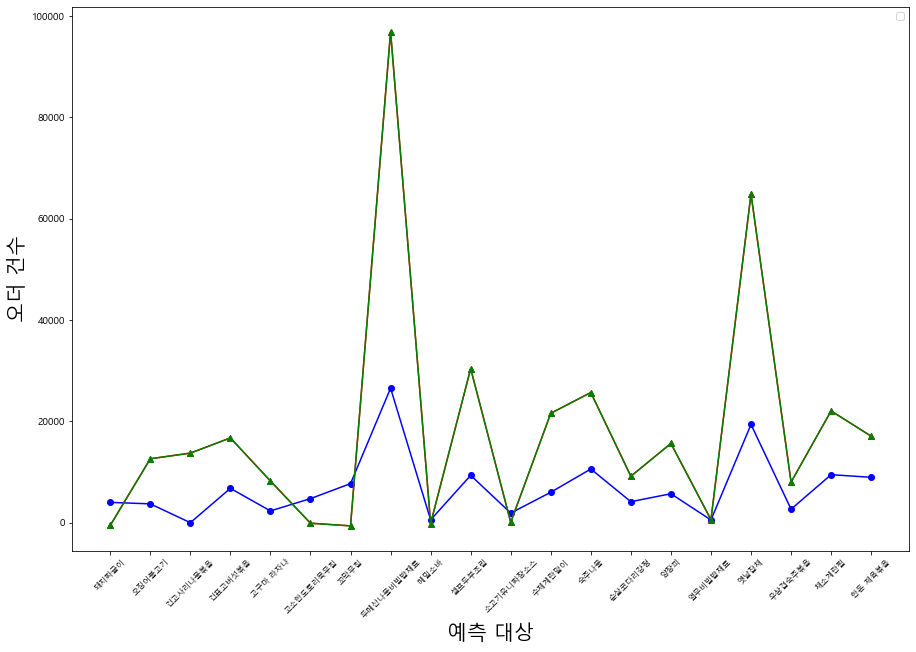

In [67]:
fig = plt.figure(figsize=(15,10))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test.sum(), marker='o', color='blue')
chart.plot(model1_test_pred.sum(), marker='^', color='red')
chart.plot(model2_test_pred.sum(), marker='^', color='green')
chart.set_xticklabels(xlabel, rotation=45, size=8)
plt.xlabel('예측 대상', size=20)
plt.ylabel('오더 건수', size=20)
plt.legend(loc='best')

### 3.6 모델 저장

In [69]:
import joblib

joblib.dump(xgb_model, 'C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0707_xgb_model_ne1500.pkl')

['C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0707_xgb_model_ne1500.pkl']

In [3]:
import joblib
model = joblib.load('C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0707_xgb_model_ne1500.pkl')

In [ ]:
test_model = model.predict()